In [20]:
import numpy as np
import scipy.stats as st
import statsmodels.datasets
import matplotlib.pyplot as plt
%matplotlib inline
data = statsmodels.datasets.heart.load_pandas().data

In [21]:
data.head()

,survival,censors,age
0,15.0,1.0,54.3
1,3.0,1.0,40.4
2,624.0,1.0,51.0
3,46.0,1.0,42.5
4,127.0,1.0,48.0


In [22]:
# censor = 0 -> the person was alive t the end of the study

# considering only a smaller population
data = data[data.censors == 1]
survival = data.survival

In [24]:
type(survival)

pandas.core.series.Series

Text(0, 0.5, 'Number of patients')

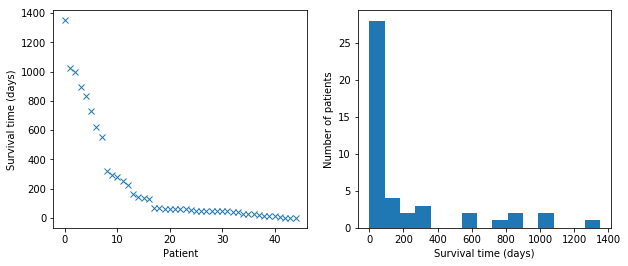

In [5]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

ax1.plot(sorted(survival)[::-1], 'x')
ax1.set_xlabel('Patient')
ax1.set_ylabel('Survival time (days)')

ax2.hist(survival, bins=15)
ax2.set_xlabel('Survival time (days)')
ax2.set_ylabel('Number of patients')

In [6]:
#L(λ,{si}) = P({si}∣λ)=λ^n (exp(−λns¯))

# Modeling with an exponential distribution λ
# maximum likelihood estimate for the paramter in this disribution  is  λ = 1/s

In [7]:
smean = survival.mean()
rate = 1. / smean

In [8]:
rate

0.004478503184713376

In [9]:
# linearly spaced x data to compare the model fit


smax = survival.max()
days = np.linspace(0., smax, 1000)
# bin size: interval between two
# consecutive values in `days`
dt = smax / 999.

In [11]:
dist_exp = st.expon.pdf(days, scale=1. / rate)

In [14]:
rate

0.004478503184713376

Text(0, 0.5, 'Number of patients')

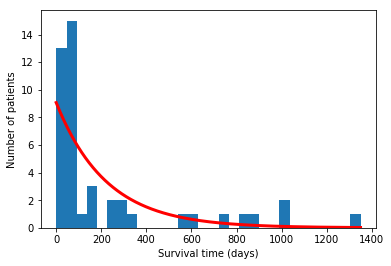

In [12]:
nbins = 30
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.hist(survival, nbins)
ax.plot(days, dist_exp * len(survival) * smax / nbins,
        '-r', lw=3)
ax.set_xlabel("Survival time (days)")
ax.set_ylabel("Number of patients")

In [15]:
dist = st.expon
args = dist.fit(survival)
args

(1.0, 222.2888888888889)

In [16]:
# Kolmogorov-Smirnov test for the goodness of the fit

st.kstest(survival, dist.cdf, args)

KstestResult(statistic=0.36199693810792966, pvalue=8.647045785181717e-06)

very low p value => null hypothesis can be rejected

In [18]:
# Modeling using Birnbaum-Sanders distribution

dist = st.fatiguelife
args = dist.fit(survival)

st.kstest(survival, dist.cdf, args)

KstestResult(statistic=0.1877344610194689, pvalue=0.07321149700086327)

 p-value is about 0.073, so that we would not reject the null hypothesis with a five percent confidence level

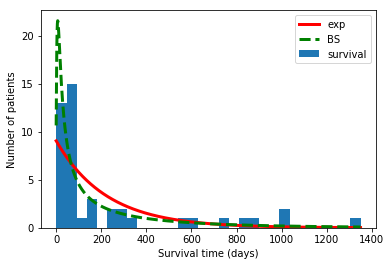

In [19]:
dist_fl = dist.pdf(days, *args)
nbins = 30
fig, ax = plt.subplots(1, 1, figsize=(6, 4))
ax.hist(survival, nbins)
ax.plot(days, dist_exp * len(survival) * smax / nbins,
        '-r', lw=3, label='exp')
ax.plot(days, dist_fl * len(survival) * smax / nbins,
        '--g', lw=3, label='BS')
ax.set_xlabel("Survival time (days)")
ax.set_ylabel("Number of patients")
ax.legend()